# 2024 C题建模

## 第二问建模

读取数据，用原始的斯坦麦茨方程计算磁芯损耗

In [185]:
import pandas as pd

df2 = pd.read_excel(r'E:\EdgeDownload\2024研究生建模\C\问题二.xlsx',sheet_name='Sheet1')

# 查看提取的数据
print(df2.head())
print(df2.shape)

    T    log_T     log_f    log_Bm     log_P      f        Bm            P  \
0  25  1.39794  4.699231 -1.539875  3.300586  50030  0.028849  1997.955250   
1  25  1.39794  4.699144 -1.502805  3.385204  50020  0.031419  2427.749830   
2  25  1.39794  4.699144 -1.449347  3.522800  50020  0.035535  3332.725760   
3  25  1.39794  4.699144 -1.397773  3.653493  50020  0.040015  4502.908007   
4  25  1.39794  4.699231 -1.346521  3.782689  50030  0.045028  6063.023248   

   material  
0         1  
1         1  
2         1  
3         1  
4         1  
(1067, 9)


### 拟合参数

- raw

In [186]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 假设你的数据集df2已经包含了磁芯损耗、频率和磁通密度峰值

# 创建一个拟合模型
X = df2[['log_f', 'log_Bm']]
y = df2['log_P']

# 添加常数项以适应截距
X = sm.add_constant(X)

# 使用OLS（普通最小二乘法）进行拟合
model = sm.OLS(y, X).fit()

# 打印拟合结果
print(model.summary())

# 提取拟合参数
k1_hat = np.exp(model.params[0])
alpha1_hat = model.params[1]
beta1_hat = model.params[2]

# 定义一个变量保存这组参数
raw_params = [k1_hat, alpha1_hat, beta1_hat]

# 打印拟合参数
print(f"拟合得到的参数：k1 = {k1_hat:.4f}, α1 = {alpha1_hat:.4f}, β1 = {beta1_hat:.4f}")


                            OLS Regression Results                            
Dep. Variable:                  log_P   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:16:30   Log-Likelihood:                 480.25
No. Observations:                1067   AIC:                            -954.5
Df Residuals:                    1064   BIC:                            -939.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7170      0.108     -6.666      0.0

C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\3098375157.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  k1_hat = np.exp(model.params[0])
C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\3098375157.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha1_hat = model.params[1]
C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\3098375157.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_hat = model.params[2]


#### 原始的
拟合得到的参数：k1 = 0.4882, α1 = 1.6059, β1 = 2.5066

- revised

控制磁芯材料、波形不变，绘制温度T与磁芯损耗log_p的图像观察是什么形状，确立拟合的模型样式

C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\3564553959.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='log_T', y='log_P', data=df2, palette="Set3")


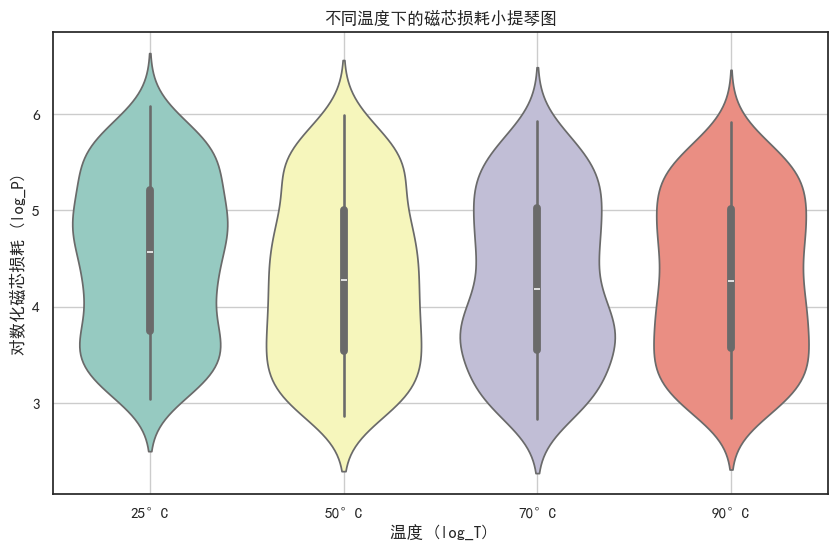

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df2 已经包含了温度 T 和磁芯损耗 P 的数据

# 绘制小提琴图
plt.figure(figsize=(10, 6))
sns.violinplot(x='log_T', y='log_P', data=df2, palette="Set3")
plt.title('不同温度下的磁芯损耗小提琴图')
plt.xlabel('温度 (log_T)')
plt.ylabel('对数化磁芯损耗 (log_P)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['25°C', '50°C', '70°C', '90°C'])
plt.grid(True)
plt.show()


有点类似线性，故使用方程为

1、log_p=logk1+a1logf+β1logBm+γlogT

2、文献中的公式：p=k1*f^a1*Bm^β1*(c0+c1*T+c2*T^2)

- 公式一拟合参数

In [188]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 假设你的数据集df2已经包含了磁芯损耗、频率和磁通密度峰值

# 创建一个拟合模型
X = df2[['log_f', 'log_Bm','log_T']]
y = df2['log_P']

# 添加常数项以适应截距
X = sm.add_constant(X)

# 使用OLS（普通最小二乘法）进行拟合
model = sm.OLS(y, X).fit()

# 打印拟合结果
print(model.summary())

# 提取拟合参数
k1_hat = np.exp(model.params[0])
alpha1_hat = model.params[1]
beta1_hat = model.params[2]
gama1_hat = model.params[3]
# 定义一个变量保存这组参数
revised_params1 = [k1_hat, alpha1_hat, beta1_hat, gama1_hat]

# 打印拟合参数
print(f"拟合得到的参数：k1 = {k1_hat:.4f}, α1 = {alpha1_hat:.4f}, β1 = {beta1_hat:.4f}, γ = {gama1_hat:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  log_P   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.379e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:16:33   Log-Likelihood:                 1093.7
No. Observations:                1067   AIC:                            -2179.
Df Residuals:                    1063   BIC:                            -2160.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1652      0.063      2.610      0.0

C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\1324674787.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  k1_hat = np.exp(model.params[0])
C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\1324674787.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha1_hat = model.params[1]
C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\1324674787.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_hat = model.params[2]
C:\Users\j

- 模型二参数拟合

In [189]:
import numpy as np
from scipy.optimize import curve_fit

# 定义非线性模型
def model(xdata, k1, a1, beta1, c, c1, c2):
    f, Bm, T = xdata  # 解包自变量
    return k1 * f**a1 * Bm**beta1 * (c + c1 * T + c2 * T**2)

# 从 df2 提取数据
f_data = df2['f'].to_numpy()
Bm_data = df2['Bm'].to_numpy()
T_data = df2['T'].to_numpy()
P_data = df2['P'].to_numpy()

# 将自变量组合在一起传递给 curve_fit
x_data = (f_data, Bm_data, T_data)

# 使用 curve_fit 拟合模型参数
# p0 是初始猜测值，可以根据实际情况调整
popt, pcov = curve_fit(model, x_data, P_data, p0=[1, 1, 1, 1, 1, 1])

# 拟合参数
k1_opt, a1_opt, beta1_opt, c_opt, c1_opt, c2_opt = popt

revised_params2 = [k1_opt, a1_opt, beta1_opt, c_opt, c1_opt, c2_opt]

# 打印拟合结果
# 使用格式化字符串输出拟合参数
print(f"拟合得到的参数：k1 = {k1_opt:.4f}, α1 = {a1_opt:.4f}, β1 = {beta1_opt:.4f}, c0 = {c_opt:.4f}, c1 = {c1_opt:.4f}, c2 = {c2_opt:.4f}")

# 使用拟合的参数计算预测值
P_pred = model(x_data, k1_opt, a1_opt, beta1_opt, c_opt, c1_opt, c2_opt)

# 计算残差平方和（SS_res）和总平方和（SS_tot）
SS_res = np.sum((P_data - P_pred) ** 2)
SS_tot = np.sum((P_data - np.mean(P_data)) ** 2)

# 计算 R²
R_squared = 1 - (SS_res / SS_tot)

# 输出 R² 值
print(f"修改模型2拟合的R²值: {R_squared:.4f}")


拟合得到的参数：k1 = -0.0044, α1 = 1.4667, β1 = 2.4509, c0 = -388.6822, c1 = 4.8230, c2 = -0.0271
修改模型2拟合的R²值: 0.9955


#### 修改的

模型一拟合得到的参数：k1 = 1.1796, α1 = 1.6422, β1 = 2.5239, γ = -0.6061

模型二拟合得到的参数：k1 = -0.0044, α1 = 1.4667, β1 = 2.4509, c0 = -388.6822, c1 = 4.8230, c2 = -0.0271

### 误差比较


In [190]:
# 预测磁芯损失
def calculate_raw_loss(f, Bm, k1, alpha1, beta1):
    return k1 * f ** alpha1 * Bm ** beta1

def calculate_revised_loss1(f, Bm, T, k1, alpha1, beta1, gama1):
    return k1 * f ** alpha1 * Bm ** beta1*T**gama1

def calculate_revised_loss2(f, Bm, T, k1, alpha1, beta1, c0,c1,c2):
    return k1 * f ** alpha1 * Bm ** beta1*(c0+c1*T+c2*T**2)

# 定义损失函数
def calculate_mae(predictions, actuals):
    return np.mean(np.abs(predictions - actuals))

def calculate_mse(predictions, actuals):
    return np.mean((predictions - actuals) ** 2)

def print_result(params, df):
    if len(params) == 3:
        predictions = [calculate_raw_loss(f, Bm, params[0], params[1], params[2]) for f, Bm in df[['f', 'Bm']].values]
        df['raw_P']= predictions
    elif len(params) == 4:
        predictions = [calculate_revised_loss1(f, Bm, T, params[0], params[1], params[2], params[3]) for f, Bm, T in df[['f', 'Bm', 'T']].values]
        df['revised_P1']= predictions
    else:
        predictions = [calculate_revised_loss2(f, Bm, T, params[0], params[1], params[2], params[3],params[4],params[5]) for f, Bm, T in df[['f', 'Bm', 'T']].values]
        df['revised_P2']= predictions
    
    actuals = df['P']
    
    mae_result = calculate_mae(predictions, actuals)
    mse_result = calculate_mse(predictions, actuals)
    rmse_result = np.sqrt(mse_result)
    if len(params) == 3:
        print('原始斯坦麦茨方程误差：')
    elif len(params) == 4:
        print('修改斯坦麦茨方程误差1：')
    else:
        print('修改斯坦麦茨方程误差2：')
    print(f"MAE: {mae_result:.4f}, MSE: {mse_result:.4f}, Rmse_result: {rmse_result:.4f}")

print_result(raw_params,df2)
print_result(revised_params1,df2)
print_result(revised_params2,df2)

原始斯坦麦茨方程误差：
MAE: 144056.9436, MSE: 79920939596.9007, Rmse_result: 282702.9176
修改斯坦麦茨方程误差1：
MAE: 19947.1919, MSE: 1694863114.7930, Rmse_result: 41168.7152
修改斯坦麦茨方程误差2：
MAE: 6775.2433, MSE: 134806625.4548, Rmse_result: 11610.6255


C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\1605779131.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='P', y='raw_P', color='#f57c6e', data=df2, palette='viridis')
C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\1605779131.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='P', y='revised_P1', color='#f2b56f', data=df2, palette='viridis')
C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\1605779131.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='P', y='revised_P2', color='#71b7ed', data=df2, palette='viridis')


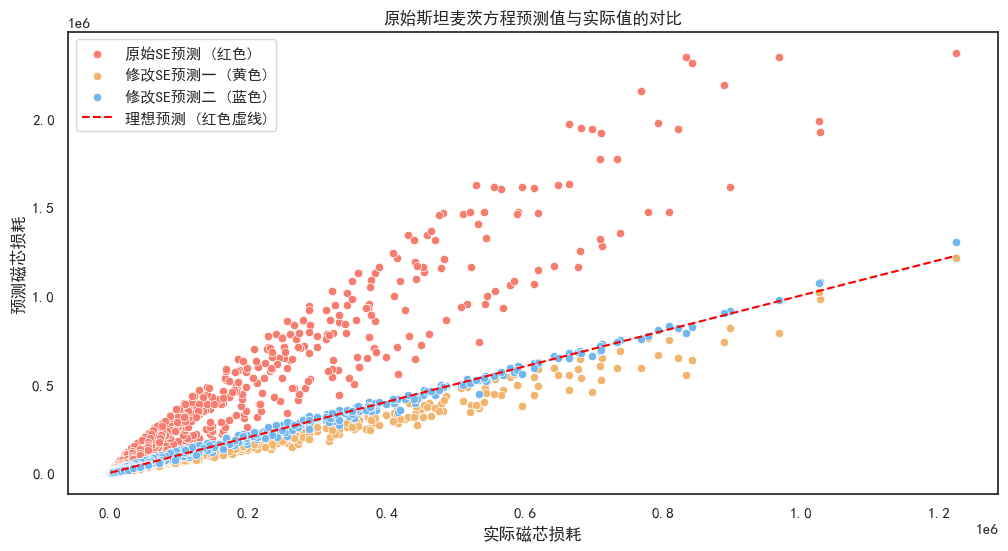

In [191]:
# 创建一个图形
plt.figure(figsize=(12, 6))
#71b7ed #b8aeeb #f2a7da
# 绘制散点图
sns.scatterplot(x='P', y='raw_P', color='#f57c6e', data=df2, palette='viridis')
sns.scatterplot(x='P', y='revised_P1', color='#f2b56f', data=df2, palette='viridis')
sns.scatterplot(x='P', y='revised_P2', color='#71b7ed', data=df2, palette='viridis')

# 绘制理想预测线
sns.lineplot(x='P', y='P', data=df2, color='red', linestyle='--')

# 设置坐标轴标签和标题
plt.xlabel('实际磁芯损耗')
plt.ylabel('预测磁芯损耗')
plt.title('原始斯坦麦茨方程预测值与实际值的对比')

# 添加图例
plt.legend(['原始SE预测 (红色)', '修改SE预测一 (黄色)', '修改SE预测二 (蓝色)','理想预测 (红色虚线)'],facecolor='white')

# 显示图形
plt.show()


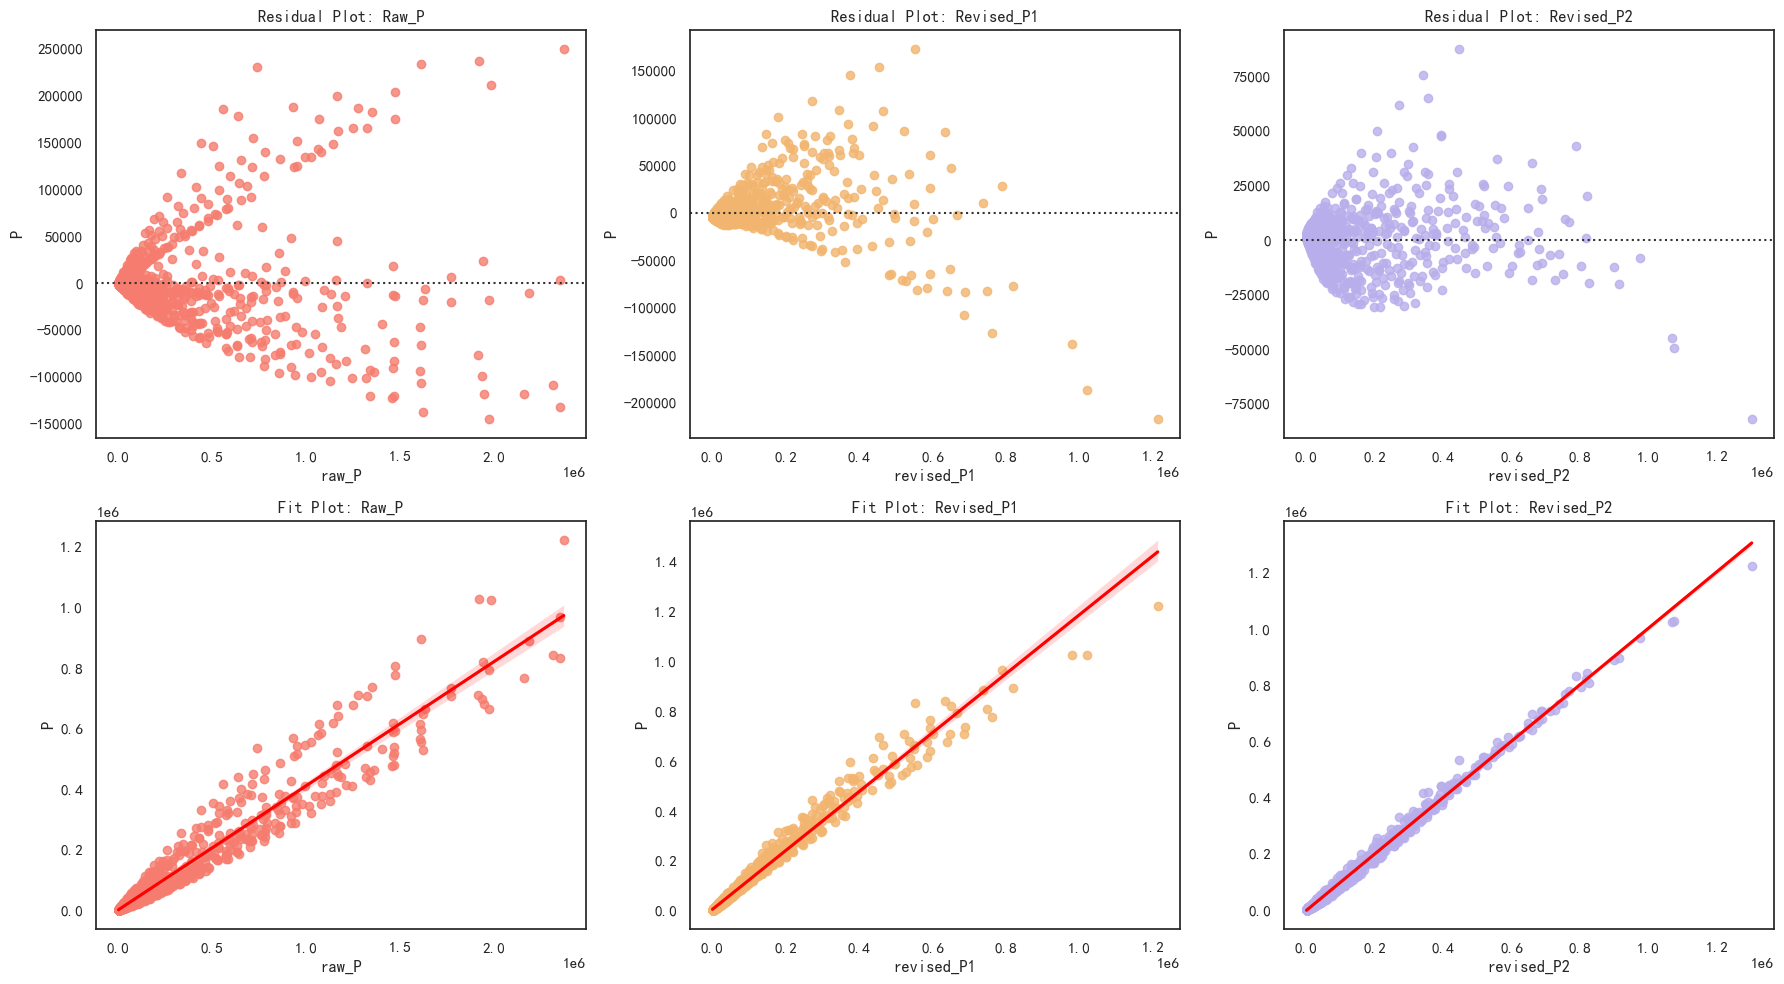

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设 df2 是你的数据框
# 数据框包含：P（实际值）、raw_P（模型1预测值）、revised_P1（模型2预测值）、revised_P2（模型3预测值）

# 创建残差列
df2['residual_raw'] = df2['P'] - df2['raw_P']
df2['residual_revised1'] = df2['P'] - df2['revised_P1']
df2['residual_revised2'] = df2['P'] - df2['revised_P2']

# 颜色列表
colors = ['#f57c6e', '#f2b56f', '#fae69e', '#84c3b7', '#88d8db', '#71b7ed', '#b8aeeb', '#f2a7da']

# 创建画布和子图
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 残差图
sns.residplot(x='raw_P', y='P', data=df2, ax=axes[0, 0], label='Raw Prediction', color=colors[0])
sns.residplot(x='revised_P1', y='P', data=df2, ax=axes[0, 1], label='Revised Prediction 1', color=colors[1])
sns.residplot(x='revised_P2', y='P', data=df2, ax=axes[0, 2], label='Revised Prediction 2', color=colors[6])

# 设置残差图的标题和颜色
axes[0, 0].set_title('Residual Plot: Raw_P')
axes[0, 1].set_title('Residual Plot: Revised_P1')
axes[0, 2].set_title('Residual Plot: Revised_P2')

# 拟合图
sns.regplot(x='raw_P', y='P', data=df2, ax=axes[1, 0], label='Raw Prediction', line_kws={'color':'red'}, scatter_kws={'color':colors[0]})
sns.regplot(x='revised_P1', y='P', data=df2, ax=axes[1, 1], label='Revised Prediction 1', line_kws={'color':'red'}, scatter_kws={'color':colors[1]})
sns.regplot(x='revised_P2', y='P', data=df2, ax=axes[1, 2], label='Revised Prediction 2', line_kws={'color':'red'}, scatter_kws={'color':colors[6]})

# 设置拟合图的标题和颜色
axes[1, 0].set_title('Fit Plot: Raw_P')
axes[1, 1].set_title('Fit Plot: Revised_P1')
axes[1, 2].set_title('Fit Plot: Revised_P2')

# 调整布局
plt.tight_layout()
plt.show()


## 第三问建模

In [170]:
import pandas as pd

df3 = pd.read_excel(r'E:\EdgeDownload\2024研究生建模\C\问题三.xlsx')

# 查看提取的数据
print(df3.head())
print(df3.shape)

    T      f shape  material            P     log_P
0  25  50030   正弦波         1  1997.955250  3.300586
1  25  50020   正弦波         1  2427.749830  3.385204
2  25  50020   正弦波         1  3332.725760  3.522800
3  25  50020   正弦波         1  4502.908007  3.653493
4  25  50030   正弦波         1  6063.023248  3.782689
(12400, 6)


### 描述性统计分析

温度

e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:1

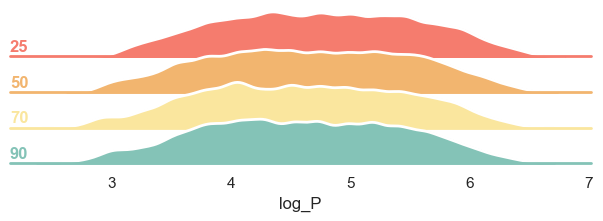

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# 自定义调色板
# custom_palette = ['#84c3b7', '#88d8db', '#71b7ed', '#b8aeeb']
custom_palette =['#f57c6e', '#f2b56f', '#fae69e', '#84c3b7'] 

# Initialize the FacetGrid object
g = sns.FacetGrid(df3, row="T", hue="T", aspect=15, height=.5, palette=custom_palette)

# Draw the densities in a few steps
g.map(sns.kdeplot, "log_P",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "log_P", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "log_P")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


励磁波型

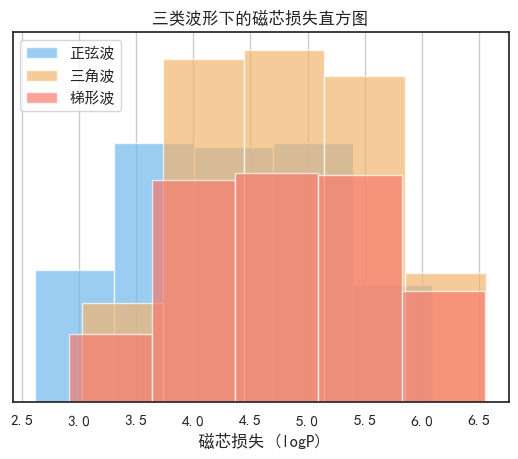

In [179]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

# 将不同波形类型的数据分开
sine_wave_data = df3[df3['shape'] == '正弦波']['log_P']
triangle_wave_data = df3[df3['shape'] == '三角波']['log_P']
trapezoid_wave_data = df3[df3['shape'] == '梯形波']['log_P']

# 创建图形和子图
fig, ax = plt.subplots()

# 绘制不同波形下的磁芯损失直方图
# ax.hist(sine_wave_data, bins=5, alpha=0.7, color='skyblue', label='正弦波')
# ax.hist(triangle_wave_data, bins=5, alpha=0.7, color='deepskyblue', label='三角波')
# ax.hist(trapezoid_wave_data, bins=5, alpha=0.7, color='dodgerblue', label='梯形波')
ax.hist(sine_wave_data, bins=5, alpha=0.7, color='#71b7ed', label='正弦波')
ax.hist(triangle_wave_data, bins=5, alpha=0.7, color='#f2b56f', label='三角波')
ax.hist(trapezoid_wave_data, bins=5, alpha=0.7, color='#f57c6e', label='梯形波')

# 添加标签和标题
ax.set_xlabel('磁芯损失 (logP)')
ax.set_ylabel('')  # 不显示纵轴标签
ax.set_yticks([])  # 隐藏纵轴上的刻度数字
ax.set_title('三类波形下的磁芯损失直方图')

# 显示网格线
ax.grid(True)

# 显示图例
ax.legend(facecolor='white')

# 显示图形
plt.show()

材料

e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
e:\Anaconda3\envs\DL\lib\site-packages\seaborn\axisgrid.py:1

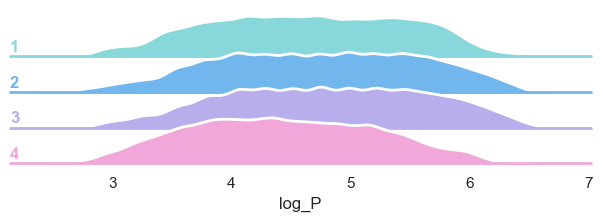

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文支持
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# 自定义调色板
custom_palette = ['#88d8db', '#71b7ed', '#b8aeeb', '#f2a7da']

# Initialize the FacetGrid object with custom palette
g = sns.FacetGrid(df3, row="material", hue="material", aspect=15, height=.5, palette=custom_palette)

# Draw the densities in a few steps
g.map(sns.kdeplot, "log_P",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "log_P", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "log_P")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Show the plot
plt.show()


### 统计分析

In [192]:
import pandas as pd
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 进行多因素方差分析
model = ols('log_P~ C(T) + C(shape) + C(material)', data=df3).fit()

# 提取残差
residuals = model.resid

# 使用Shapiro-Wilk检验残差是否服从正态分布
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk正态性检验 p值: {p}")

if p > 0.05:
    print("残差服从正态分布")
else:
    print("残差不服从正态分布")


Shapiro-Wilk正态性检验 p值: 1.4285193066994547e-42
残差不服从正态分布


e:\Anaconda3\envs\DL\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12400.
  res = hypotest_fun_out(*samples, **kwds)


Box-Cox 变换的最佳 λ: 0.8864361296793469


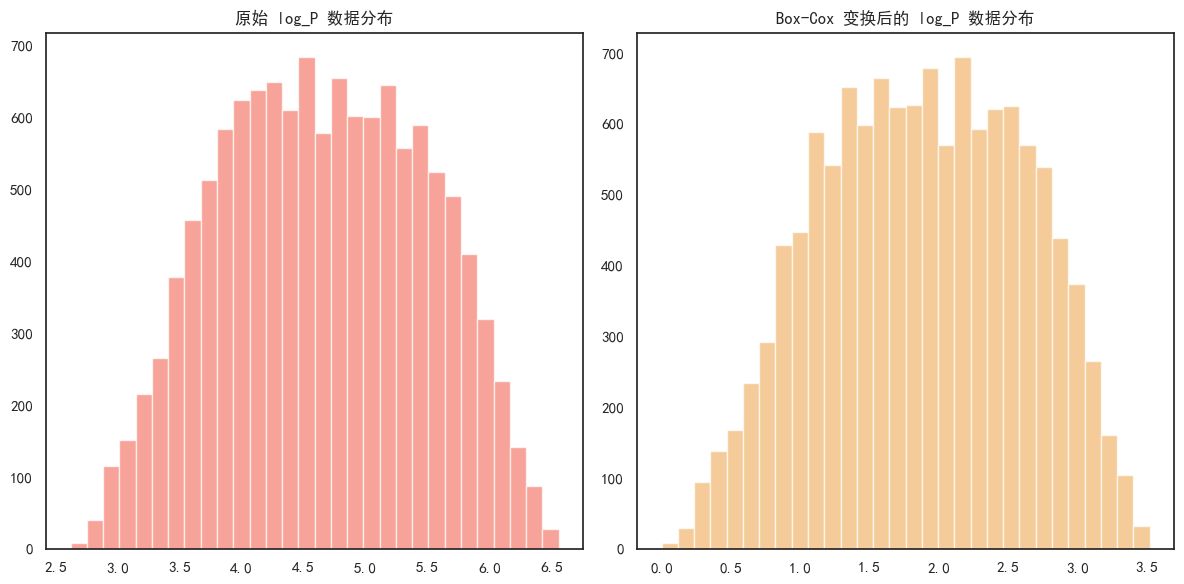

In [176]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

# 假设 df3 中 'log_P' 是需要进行 Box-Cox 变换的列
# 注意：Box-Cox 变换要求数据为正，因此需要加上一个常数，确保数据为正
df3['log_P_positive'] = df3['log_P'] + 1 - df3['log_P'].min()

# 进行 Box-Cox 变换，scipy会自动找到最优的 lambda
log_P_boxcox, lambda_ = stats.boxcox(df3['log_P_positive'])

# 打印最优的 lambda
print(f"Box-Cox 变换的最佳 λ: {lambda_}")

# 可视化 Box-Cox 变换前后的数据分布
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df3['log_P'], bins=30, color='#f57c6e', alpha=0.7)
plt.title('原始 log_P 数据分布')
 
plt.subplot(1, 2, 2)
plt.hist(log_P_boxcox, bins=30, color='#f2b56f', alpha=0.7)
plt.title('Box-Cox 变换后的 log_P 数据分布')

plt.tight_layout()
plt.show()


方差齐性

In [164]:
from scipy.stats import levene

# Levene's 检验，检查 T, shape, material 的不同组别
stat, p = levene(df3['log_P'][df3['T'] == 25],
                 df3['log_P'][df3['T'] == 50],
                 df3['log_P'][df3['T'] == 70],
                 df3['log_P'][df3['T'] == 90])
 

if p > 0.05:
    print("各组方差齐性假设成立")
else:
    print("方差不齐")


Levene’s方差齐性检验 p值: 0.1036505739387627
各组方差齐性假设成立


C:\Users\jfbb\AppData\Local\Temp\ipykernel_7528\321249836.py:13: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(x='Group', y='log_P', hue='Factor', data=df_melt, palette=['#f57c6e', '#f2b56f', '#fae69e', '#84c3b7'])


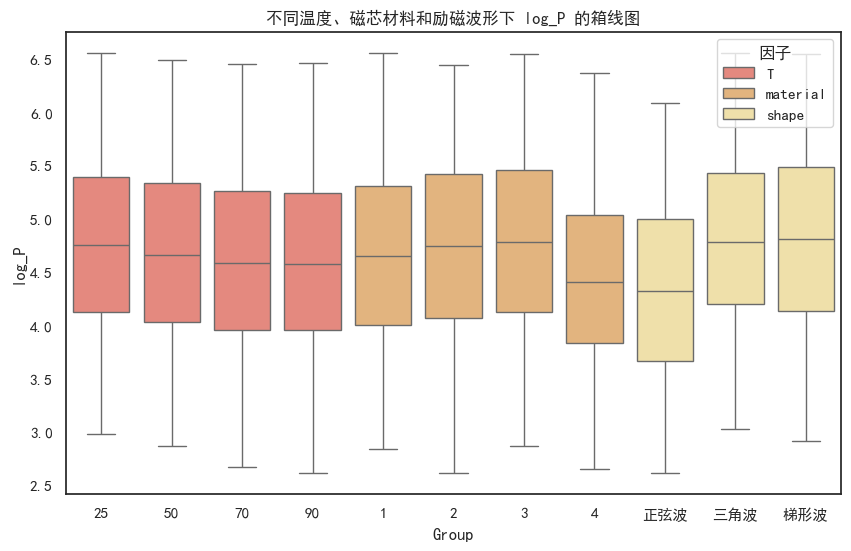

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df3 是你的数据框

# 重塑数据，使其包含所有要显示的分组信息
df_melt = pd.melt(df3, id_vars=['log_P'], value_vars=['T', 'material', 'shape'], 
                  var_name='Factor', value_name='Group')
    
# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='log_P', hue='Factor', data=df_melt, palette=['#f57c6e', '#f2b56f', '#fae69e', '#84c3b7'])

# 设置图表标题和轴标签
plt.title("不同温度、磁芯材料和励磁波形下 log_P 的箱线图")
plt.ylabel("log_P")

# 显示图例
plt.legend(title="因子",loc='upper right',facecolor='white')

# 展示图形
plt.show()


#### 单独效应

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# 假设df包含了温度、波形、材料和磁芯损耗
model = ols('log_P ~ C(T) + C(shape) + C(material)', data=df3).fit()

# 输出ANOVA结果
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(T),59.914103,3.0,32.942698,3.364276e-21
C(shape),665.688263,2.0,549.025171,3.473945e-229
C(material),229.428045,3.0,126.146906,1.730418e-80
Residual,7511.990071,12391.0,NaN,NaN


- sum_sq: 这是每个因素的平方和（Sum of Squares），表示该因素对因变量（磁芯损耗 logP）变化的贡献。
- df: 自由度（Degrees of Freedom），它指的是每个因素可以自由变化的次数。自由度通常等于类别数减去1。
- F: F统计量，它用于衡量该因素对因变量的解释能力。F值越大，说明该因素对因变量的影响越显著。
- PR(>F): p值，用于判断统计结果是否显著。p值越小，表明自变量对因变量的影响越显著，通常认为 p 值小于 0.05 时影响显著。

结果解读：
C(T): 这里的 T 应该是温度，作为分类变量（离散变量），其自由度为3，表示有4个温度水平（例如：25℃、50℃、70℃、90℃）。其F值为 32.942698，p值（PR(>F)）为 3.364276e-21，这是一个非常小的值，表示温度对磁芯损耗有显著影响。

C(shape): shape 是励磁波形（正弦波、三角波、梯形波），其自由度为2，表示有3种波形。F值为 549.025171，p值为 3.473945e-229，这说明励磁波形对磁芯损耗的影响非常显著，其影响远大于温度。

C(material): material 是磁芯材料，自由度为3，表示有4种材料。F值为 126.146906，p值为 1.730418e-80，同样，这表明材料对磁芯损耗也有显著影响，且比温度的影响更大，但不如励磁波形的影响。

Residual: 残差项（Residual）表示未能通过自变量解释的部分，代表模型误差。其平方和为 7511.990071，自由度为 12391。这个值表明尽管温度、波形、材料对磁芯损耗有显著影响，但还有一部分变化是由其他未包括在模型中的因素引起的。

励磁波形（shape） 对磁芯损耗的影响最大，F值和p值表明励磁波形的变化对磁芯损耗的贡献非常显著。这可能是因为不同波形对磁芯损耗的机制差异较大，导致了显著的损耗差异。

磁芯材料（material） 的影响次之，其F值较大，也有显著的影响。不同材料的导磁性能、损耗特性可能影响了磁芯损耗。

温度（T） 的影响相对较小，但仍显著（F值较低，但p值非常小），这说明温度变化对磁芯损耗也有影响，可能与材料在不同温度下的导磁性和损耗特性变化相关。

p值非常小（接近于零），说明这些自变量对磁芯损耗的影响是非常显著的。
温度、励磁波形和材料这三个因素显著地影响了磁芯损耗的变化，但模型的残差（Residual）仍然较大，这意味着还有一些因素没有被纳入分析（例如频率、磁通密度等），它们可能也对磁芯损耗有影响。

#### 交互效应

使用 * 来表示交互作用

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 交互项分析
# 'logP ~ C(温度) + C(波形) + C(材料)' 是主效应模型
# 'C(温度):C(材料)' 表示温度和材料的交互作用
# 'C(波形):C(材料)' 表示波形和材料的交互作用
model = ols('log_P ~ C(T) * C(material) + C(shape) * C(T)+ C(shape) * C(material)+ C(T)*C(shape) * C(material)', data=df3).fit()

# 输出ANOVA表格结果，包括主效应和交互作用
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                sum_sq       df           F         PR(>F)
C(T)                         61.223705      3.0   33.767058   9.992315e-22
C(material)                 223.912724      3.0  123.495857   8.197339e-79
C(shape)                    665.384118      2.0  550.474625  9.830051e-230
C(T):C(material)              1.344329      9.0    0.247148   9.873941e-01
C(shape):C(T)                 7.559623      6.0    2.084701   5.162649e-02
C(shape):C(material)         23.765339      6.0    6.553716   6.347055e-07
C(T):C(shape):C(material)    13.322049     18.0    1.224598   2.303302e-01
Residual                   7465.216598  12352.0         NaN            NaN


1. 主效应分析：
温度（C(T)）: F值为 33.76，p值为 1.015309e-21，表明温度对磁芯损耗有显著影响。不同温度条件下的磁芯损耗存在显著差异。

材料（C(material)）: F值为 123.46，p值为 8.658561e-79，说明材料对磁芯损耗的影响非常显著，材料的选择对磁芯损耗有重要影响。

励磁波形（C(shape)）: F值为 550.29，p值为 1.123179e-229，这是最显著的因素，表明不同的励磁波形对磁芯损耗的影响非常大。

2. 交互效应分析：

温度和材料的交互效应（C(T)(material)）：F值为 0.247068，p值为 0.9874，这是一个非常大的p值，表明温度和材料之间的交互作用不显著。也就是说，温度和材料之间的组合对磁芯损耗的影响并没有产生显著的协同或抑制作用。

温度和励磁波形的交互效应（C(shape)(T)）：F值为 2.084020，p值为 0.0517，这个p值非常接近显著水平（通常设定为0.05）。虽然不是特别显著，但仍可以认为温度和励磁波形之间存在一些交互作用。温度在某些波形下可能会增强或减弱磁芯损耗的影响，但影响不如材料与波形的交互作用显著。

励磁波形和材料的交互效应（C(shape)(material)）：F值为 6.551575，p值为 6.383643e-07，这表明波形和材料之间有非常显著的交互作用。不同材料在不同波形下对磁芯损耗的影响非常显著，表明在某些材料和波形的组合下，磁芯损耗可能会显著增加或减少。

这种交互作用表明，选择合适的材料和波形组合对于优化磁芯损耗非常重要。

3. 残差（Residual）：
残差项表示未能通过模型解释的部分。虽然模型解释了部分变化，但仍然有较大的残差（7478.54），表明磁芯损耗还受到其他未包含在模型中的因素的影响。
4. 综合结论：
主效应：温度、材料、励磁波形对磁芯损耗都有显著影响，尤其是励磁波形的影响最大。
交互作用：
温度和材料之间的交互作用不显著，说明在不同温度和材料组合下，磁芯损耗并没有显著变化。
温度和励磁波形之间的交互作用接近显著，表明温度在不同波形下对磁芯损耗可能有一定的影响，但不如其他交互项显著。
励磁波形和材料之间的交互作用非常显著，表明选择合适的材料和波形组合对优化磁芯损耗至关重要。

#### 事后检验

In [39]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 假设 df3 是包含温度、波形、材料和 logP 的数据框
# 使用 Tukey HSD 事后检验，比较不同波形的均值差异
tukey_result = pairwise_tukeyhsd(endog=df3['log_P'], groups=df3['shape'], alpha=0.05)

# 打印结果
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   三角波    梯形波  -0.0091 0.8651 -0.0505  0.0324  False
   三角波    正弦波   -0.486    0.0 -0.5254 -0.4466   True
   梯形波    正弦波   -0.477    0.0 -0.5202 -0.4337   True
----------------------------------------------------


In [40]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 假设 df3 是包含温度、波形、材料和 logP 的数据框
# 使用 Tukey HSD 事后检验，比较不同波形的均值差异
tukey_result = pairwise_tukeyhsd(endog=df3['log_P'], groups=df3['T'], alpha=0.05)

# 打印结果
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    25     50  -0.0945    0.0 -0.1477 -0.0413   True
    25     70  -0.1572    0.0 -0.2106 -0.1038   True
    25     90  -0.1592    0.0 -0.2125 -0.1059   True
    50     70  -0.0627 0.0154 -0.1168 -0.0086   True
    50     90  -0.0647 0.0112 -0.1187 -0.0107   True
    70     90   -0.002 0.9997 -0.0562  0.0522  False
----------------------------------------------------


In [41]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 假设 df3 是包含温度、波形、材料和 logP 的数据框
# 使用 Tukey HSD 事后检验，比较不同波形的均值差异
tukey_result = pairwise_tukeyhsd(endog=df3['log_P'], groups=df3['material'], alpha=0.05)

# 打印结果
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.0891 0.0001  0.0366  0.1415   True
     1      3   0.1483    0.0  0.0968  0.1999   True
     1      4  -0.2065    0.0   -0.26 -0.1531   True
     2      3   0.0592  0.022   0.006  0.1124   True
     2      4  -0.2956    0.0 -0.3506 -0.2406   True
     3      4  -0.3549    0.0  -0.409 -0.3007   True
----------------------------------------------------


#### 最优参数求解

In [195]:
import pandas as pd

# 假设df3包含温度、波形、材料和磁芯损耗log_P
# 分组计算不同波形和材料组合下的平均磁芯损耗
grouped = df3.groupby(['shape', 'material'])['P'].mean().reset_index()

# 找到磁芯损耗最小的组合
min_loss = grouped.loc[grouped['P'].idxmin()]

# 输出最小磁芯损耗的组合和对应的值
print("磁芯损耗最小的波形和材料组合是:")
print(min_loss)

磁芯损耗最小的波形和材料组合是:
shape               正弦波
material              4
P           43435.48147
Name: 11, dtype: object


In [196]:
import pandas as pd

# 假设df3包含温度、波形、材料和磁芯损耗log_P
# 分组计算不同波形和材料组合下的平均磁芯损耗
grouped = df3.groupby(['shape', 'material','T'])['log_P'].mean().reset_index()

# 找到磁芯损耗最小的组合
min_loss = grouped.loc[grouped['log_P'].idxmin()]

# 输出最小磁芯损耗的组合和对应的值
print("磁芯损耗最小的波形和材料组合是:")
print(min_loss)

磁芯损耗最小的波形和材料组合是:
shape            正弦波
material           4
T                 90
log_P       4.103554
Name: 47, dtype: object


In [197]:
import pandas as pd

# 提取波形为“正弦波”，材料为“4”的数据
subset = df3[(df3['shape'] == '正弦波')& (df3['material'] == 1) ]
# 按照温度（T）分组，计算每个温度下的磁芯损耗均值
temperature_loss = subset.groupby('T')['P'].mean().reset_index()

# 输出不同温度下的磁芯损耗均值
print(temperature_loss)

# 找到磁芯损耗最小的温度
optimal_temperature = temperature_loss.loc[temperature_loss['P'].idxmin()]
print(f"最优温度是: {optimal_temperature['T']}，对应的磁芯损耗为: {optimal_temperature['P']}")
# subset

    T              P
0  25  133503.357368
1  50  101899.677119
2  70   88388.417255
3  90   83048.339982
最优温度是: 90.0，对应的磁芯损耗为: 83048.33998228655


# 第五问建模

In [1]:
import pandas as pd

df5 = pd.read_excel(r'E:\EdgeDownload\2024研究生建模\C\问题五.xlsx')

# 使用 replace 方法将文字转换为数字
df5['shape'] = df5['shape'].replace({
    '正弦波': 1,
    '三角波': 2,
    '梯形波': 3
})

# 查看提取的数据
print(df5.head())
print(df5.shape)

    T      f  shape        Bm  material            P
0  25  50030      1  0.028849         1  1997.955250
1  25  50020      1  0.031419         1  2427.749830
2  25  50020      1  0.035535         1  3332.725760
3  25  50020      1  0.040015         1  4502.908007
4  25  50030      1  0.045028         1  6063.023248
(12400, 6)


C:\Users\jfbb\AppData\Local\Temp\ipykernel_26768\908472735.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5['shape'] = df5['shape'].replace({


In [2]:
# 查看所有列的数据类型
print(df5.dtypes)

T             int64
f             int64
shape         int64
Bm          float64
material      int64
P           float64
dtype: object


In [2]:
import random
from deap import base, creator, tools, algorithms
import numpy as np

# 目标是最小化 F = P / (Bm * f)
def objective_function(individual):
    T, f, shape, Bm, material = individual  # 解包五个变量

    # 计算公式，计算 P
    P = np.sqrt(material + (((0.047636 * ((f * (Bm ** 1.275)) - T)) + shape) + material)) - 0.23616
    
    # 计算目标函数 F
    F = P / (Bm * f)
    return F,  # 返回元组

# 创建最小化问题
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# 定义变量的范围和类型
toolbox = base.Toolbox()

# 决策变量的初始化
toolbox.register("attr_T", random.choice, [25, 50, 70, 90])  # 温度T
toolbox.register("attr_f", random.uniform, 49940, 501180)     # 频率f
toolbox.register("attr_shape", random.choice, [1, 2, 3])      # 波形shape
toolbox.register("attr_Bm", random.uniform, 0.00963815, 0.313284469) # 磁通密度Bm
toolbox.register("attr_material", random.choice, [1, 2, 3, 4]) # 材料material

# 创建个体：一个个体是由5个变量组成的向量
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_T, toolbox.attr_f, toolbox.attr_shape, toolbox.attr_Bm, toolbox.attr_material))

# 定义种群
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 评估函数
toolbox.register("evaluate", objective_function)

# 遗传算法操作：交叉、变异、选择
# 对于连续变量，使用 cxBlend 和 mutGaussian
def mate_individuals(ind1, ind2):
    # 对连续变量使用 Blend 交叉
    for i in [1, 3]:  # f 和 Bm 是连续变量
        ind1[i] = tools.cxBlend([ind1[i]], [ind2[i]], alpha=0.5)[0]  # 提取标量
        ind2[i] = tools.cxBlend([ind2[i]], [ind1[i]], alpha=0.5)[0]
    # 对离散变量随机交换
    for i in [0, 2, 4]:  # T, shape, material 是离散变量
        if random.random() < 0.5:
            ind1[i], ind2[i] = ind2[i], ind1[i]

def mutate_individual(individual):
    # 对连续变量使用 Gaussian 变异
    for i in [1, 3]:  # f 和 Bm 是连续变量
        individual[i] += random.gauss(0, 1)
    # 对离散变量随机赋值
    individual[0] = random.choice([25, 50, 70, 90])  # T
    individual[2] = random.choice([1, 2, 3])  # shape
    individual[4] = random.choice([1, 2, 3, 4])  # material
    return individual

toolbox.register("mate", mate_individuals)
toolbox.register("mutate", mutate_individual)
toolbox.register("select", tools.selTournament, tournsize=3)

# 运行遗传算法
def main():
    random.seed(42)
    
    # 创建初始种群
    population = toolbox.population(n=100)
    
    # 统计数据
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", lambda x: sum(x) / len(x))
    stats.register("min", min)
    stats.register("max", max)

    # 运行遗传算法
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, verbose=True)
    
    # 输出最优解
    best_individual = tools.selBest(population, k=1)[0]
    print(f"最优解是: {best_individual}")
    print(f"最小的目标函数值是: {best_individual.fitness.values[0]}")

if __name__ == "__main__":
    main()